#  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : April 7th  2021
- creation update : April 7th 2021
- version v0

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
from iminuit import Minuit
import iminuit

In [3]:
iminuit.__version__

'2.2.0'

In [39]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectroscopy import Lines, HALPHA, HBETA, O2_1
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc

# Function

In [5]:
def file_target(filename):
    m=re.findall('^Cor_holo4_003_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [6]:
filename_logbook='logbooks/auxtellogbook_2021_v1.2.csv'

In [7]:
df=pd.read_csv(filename_logbook)

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
df

Unnamed: 0  index                     date  \
0            0      0  2021-02-17T01:45:09.091   
1            1      1  2021-02-17T03:37:12.647   
2            2      2  2021-02-18T07:25:02.387   
3            3      3  2021-02-18T07:25:46.560   
4            4      4  2021-02-18T07:26:07.146   
5            5      5  2021-02-18T07:26:18.957   
6            6      6  2021-02-18T07:26:43.049   
7            7      7  2021-02-18T07:26:51.615   
8            8      8  2021-02-18T07:27:00.190   
9            9      9  2021-02-18T07:27:53.863   
10          10     10  2021-02-18T07:29:41.903   
11          11     11  2021-02-19T05:53:27.926   
12          12     12  2021-02-19T05:55:59.153   
13          13     13  2021-02-19T05:56:26.421   
14          14     14  2021-02-19T05:59:48.510   
15          15     15  2021-02-19T06:02:10.932   
16          16     16  2021-02-19T06:03:07.565   
17          17     17  2021-02-19T06:03:51.105   
18          18     18  2021-02-19T06:04:27.300   
19          19     19  2021-02-19T06:05:05.010   
20          20     20  2021-02-19T06:06:29.575   
21          21     21  2021-02-19T06:06:53.561   
22          22     22  2021-02-19T06:07:09.034   
23          23     23  2021-02-19T06:07:49.989   
24          24     24  2021-02-19T06:09:04.533   
25          25     25  2021-02-19T06:09:36.863   
26          26     26  2021-02-19T06:11:51.450   
27          27     27  2021-02-19T06:12:39.359   
28          28     28  2021-02-19T06:13:21.360   
29          29     29  2021-02-19T06:13:36.394   
30          30     30  2021-02-19T06:13:43.043   
31          31     31  2021-02-19T06:13:50.035   
32          32     32  2021-02-19T06:13:57.849   
33          33     33  2021-02-19T06:14:06.963   
34          34     34  2021-02-19T06:14:16.655   
35          35     35  2021-02-19T06:14:25.695   
36          36     36  2021-02-19T06:14:35.269   
37          37     37  2021-02-19T06:15:14.640   
38          38     38  2021-02-19T06:15:29.988   
39          39     39  2021-02-19T06:15:42.966   
40          40     40  2021-02-19T06:16:00.336   
41          41     41  2021-02-19T06:16:42.390   
42          42     42  2021-02-19T06:18:37.431   
43          43     43  2021-02-19T06:25:48.342   
44          44     44  2021-02-19T06:26:07.604   
45          45     45  2021-02-19T06:26:35.551   
46          46     46  2021-02-19T06:28:33.570   
47          47     47  2021-02-19T06:29:01.054   
48          48     48  2021-03-12T01:01:30.478   
49          49     49  2021-03-12T01:02:00.570   
50          50     50  2021-03-12T01:02:28.770   
51          51     51  2021-03-12T01:23:46.224   
52          52     52  2021-03-12T01:24:21.169   
53          53     53  2021-03-12T01:24:42.413   
54          54     54  2021-03-12T02:45:25.087   
55          55     55  2021-03-12T02:47:31.346   
56          56     56  2021-03-12T02:48:00.283   
57          57     57  2021-03-12T02:48:29.927   
58          58     58  2021-03-12T02:48:58.831   
59          59     59  2021-03-12T02:49:27.942   
60          60     60  2021-03-12T02:49:57.673   
61          61     61  2021-03-12T02:50:27.091   
62          62     62  2021-03-12T02:50:56.136   
63          63     63  2021-03-12T02:51:25.196   
64          64     64  2021-03-12T02:51:54.248   
65          65     65  2021-03-12T02:52:23.352   
66          66     66  2021-03-12T02:52:52.463   
67          67     67  2021-03-12T02:53:21.563   
68          68     68  2021-03-12T02:53:51.050   
69          69     69  2021-03-12T02:54:20.571   
70          70     70  2021-03-12T02:54:49.518   
71          71     71  2021-03-12T02:55:18.628   
72          72     72  2021-03-12T02:55:47.723   
73          73     73  2021-03-12T02:56:17.274   
74          74     74  2021-03-12T02:56:46.922   
75          75     75  2021-03-12T02:57:15.859   

                                                 path  \
0   /sps/lsst/groups/auxtel/data/2021/holo/FlipCleans   
1   /sps/lsst/groups/auxtel/data/2021/h

# Selection of input file

In [10]:
df_good=df[df["quality"]==1]

In [11]:
for spectra_file in df_good["file"]:
    print(spectra_file)

Cor_holo4_003_NGC4755_2021-02-17_350.fits
Cor_holo4_003_NGC4755_2021-02-17_351.fits
Cor_holo4_003_NGC4755_2021-02-17_352.fits
Cor_holo4_003_NGC4755_2021-02-17_353.fits
Cor_holo4_003_NGC4755_2021-02-17_354.fits
Cor_holo4_003_NGC4755_2021-02-17_355.fits
Cor_holo4_003_NGC4755_2021-02-17_356.fits
Cor_holo4_003_NGC4755_2021-02-17_357.fits
Cor_holo4_003_NGC4755_2021-02-17_358.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_556.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_559.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_560.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_561.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_562.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_563.fits
Cor_holo4_003_RG610_HD60753_2021-02-18_564.fits
Cor_holo4_003_empty_HD60753_2021-02-18_566.fits
Cor_holo4_003_empty_HD60753_2021-02-18_567.fits
Cor_holo4_003_empty_HD60753_2021-02-18_568.fits
Cor_holo4_003_empty_HD60753_2021-02-18_569.fits
Cor_holo4_003_empty_HD60753_2021-02-18_570.fits
Cor_holo4_003_empty_HD60753_2021-02-18_571.fit

In [12]:
dir_spectra="outputs"

In [13]:
!ls

README.md                  outputs
anaSpectra.ipynb           outputs_reprocess
checkDisperser.ipynb       processSpectra.ipynb
config                     processSpectraSim.ipynb
figures_reprocess          readMySpectra.ipynb
logbooks                   readSpectractSpectra.ipynb
makeLogbook.ipynb          reprocessSpectra.ipynb
makeLogbook_ronchi.ipynb


In [14]:
all_files=os.listdir(dir_spectra)

In [15]:
all_spectra_files = []
for filename in all_files:
    if re.search("_spectrum.fits$",filename):
        all_spectra_files.append(filename)
N=len(all_spectra_files)

In [16]:
all_good_spectra_spectrum_files=[]

for good_spectra_file in df_good["file"]:
    good_spectra_spectrum_file = good_spectra_file.split(".")[0]+"_spectrum.fits"
    if good_spectra_spectrum_file in all_spectra_files:
        print("found {}".format(good_spectra_spectrum_file))
        all_good_spectra_spectrum_files.append(good_spectra_spectrum_file)
    

found Cor_holo4_003_NGC4755_2021-02-17_350_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_352_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_353_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_354_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_355_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_356_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_357_spectrum.fits
found Cor_holo4_003_NGC4755_2021-02-17_358_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_556_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_559_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_560_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_561_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_562_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_563_spectrum.fits
found Cor_holo4_003_RG610_HD60753_2021-02-18_564_spectrum.fits
found Cor_holo4_003_empty_HD60753_2021-02-18_566_spectrum.fits
found Cor_holo4_003_empty_HD60753_2021-0

0 ) Cor_holo4_003_NGC4755_2021-02-17_350_spectrum.fits


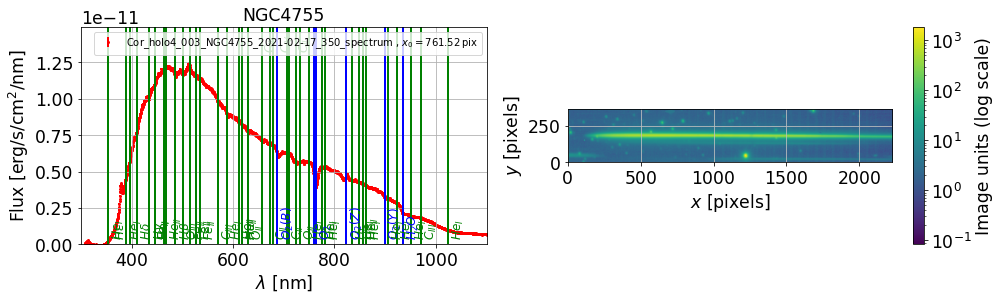

1 ) Cor_holo4_003_NGC4755_2021-02-17_352_spectrum.fits


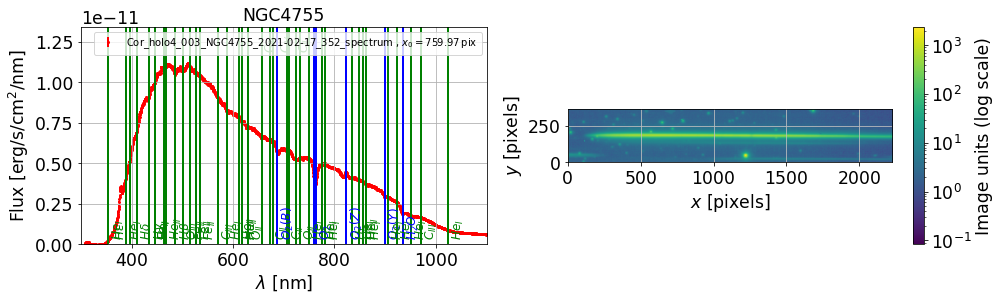

2 ) Cor_holo4_003_NGC4755_2021-02-17_353_spectrum.fits


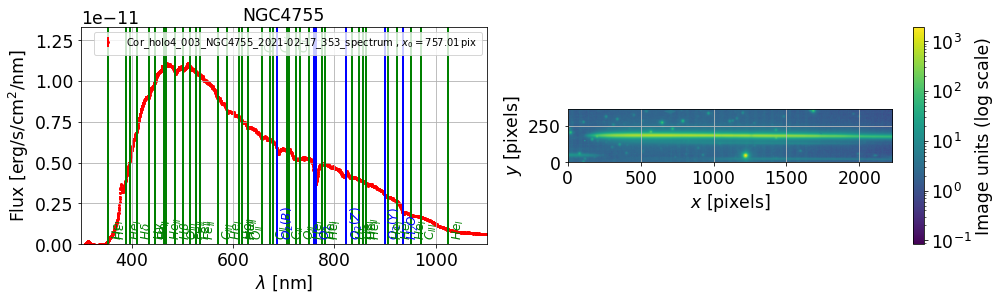

3 ) Cor_holo4_003_NGC4755_2021-02-17_354_spectrum.fits


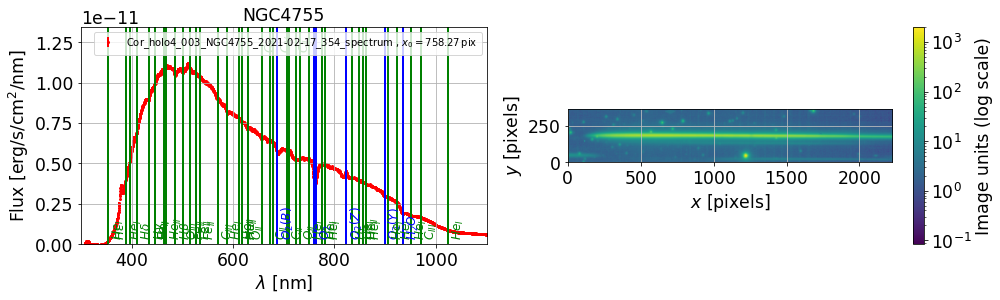

4 ) Cor_holo4_003_NGC4755_2021-02-17_355_spectrum.fits


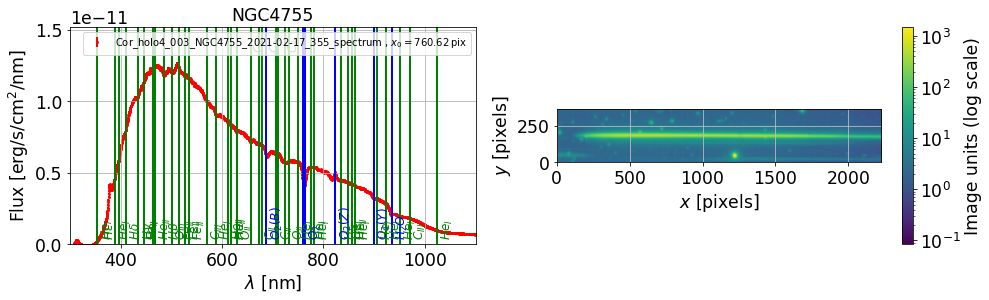

5 ) Cor_holo4_003_NGC4755_2021-02-17_356_spectrum.fits


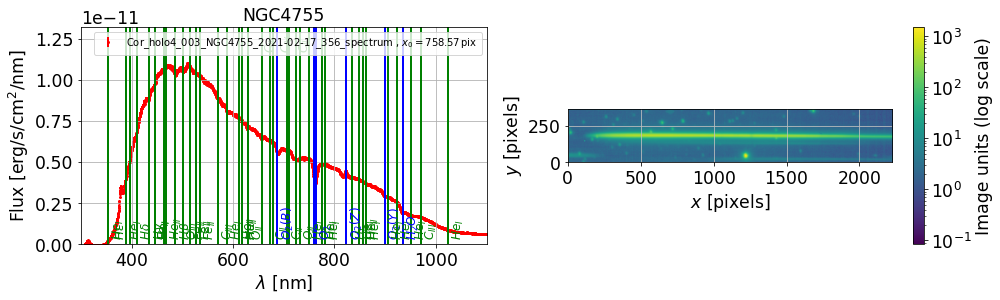

6 ) Cor_holo4_003_NGC4755_2021-02-17_357_spectrum.fits


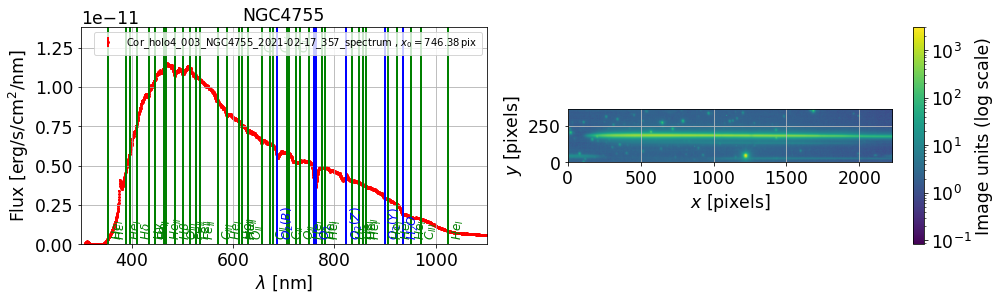

7 ) Cor_holo4_003_NGC4755_2021-02-17_358_spectrum.fits


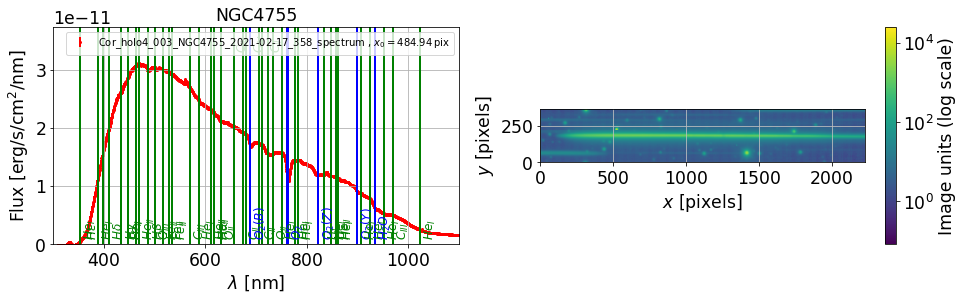

8 ) Cor_holo4_003_RG610_HD60753_2021-02-18_556_spectrum.fits


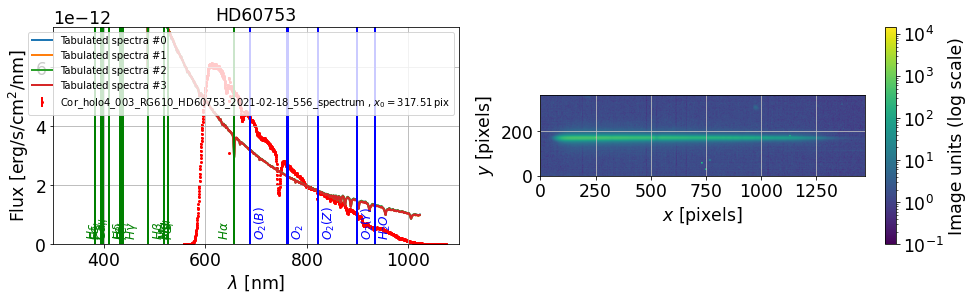

9 ) Cor_holo4_003_RG610_HD60753_2021-02-18_559_spectrum.fits


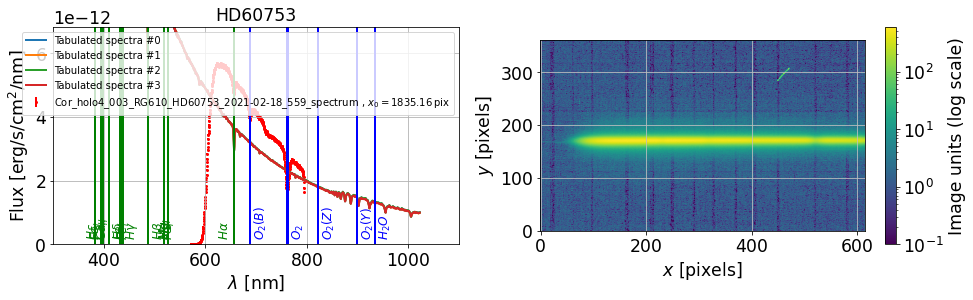

10 ) Cor_holo4_003_RG610_HD60753_2021-02-18_560_spectrum.fits


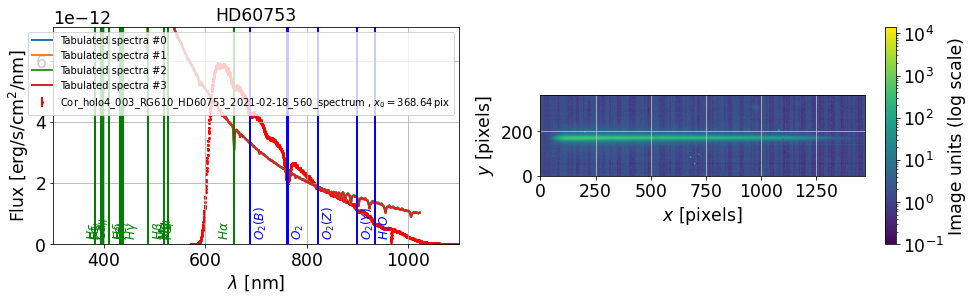

11 ) Cor_holo4_003_RG610_HD60753_2021-02-18_561_spectrum.fits


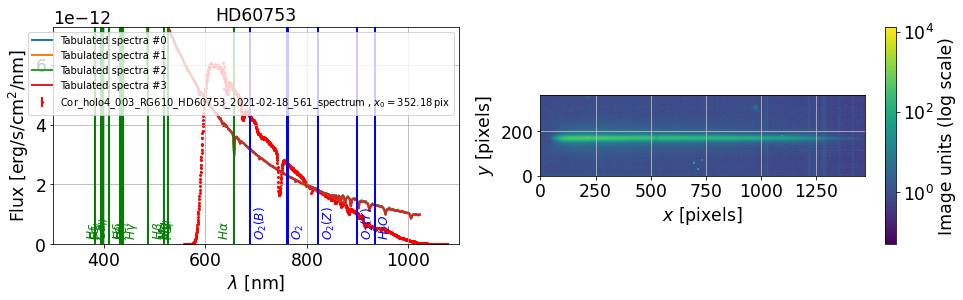

12 ) Cor_holo4_003_RG610_HD60753_2021-02-18_562_spectrum.fits


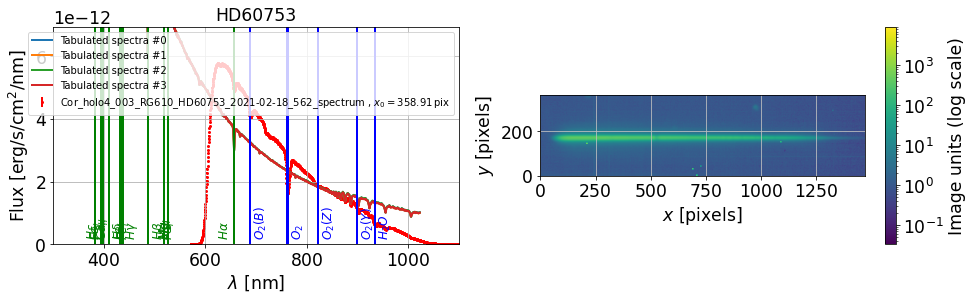

13 ) Cor_holo4_003_RG610_HD60753_2021-02-18_563_spectrum.fits


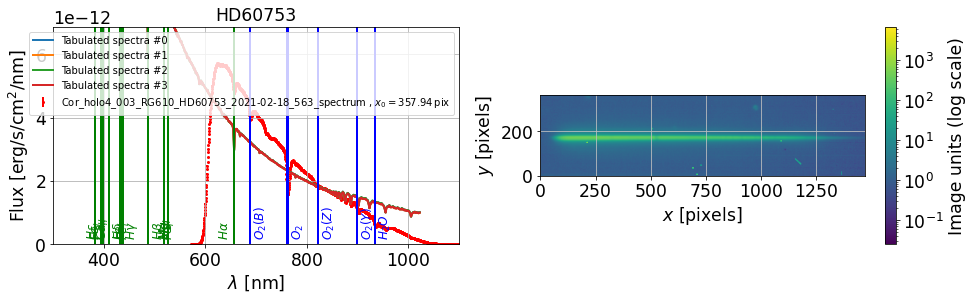

14 ) Cor_holo4_003_RG610_HD60753_2021-02-18_564_spectrum.fits


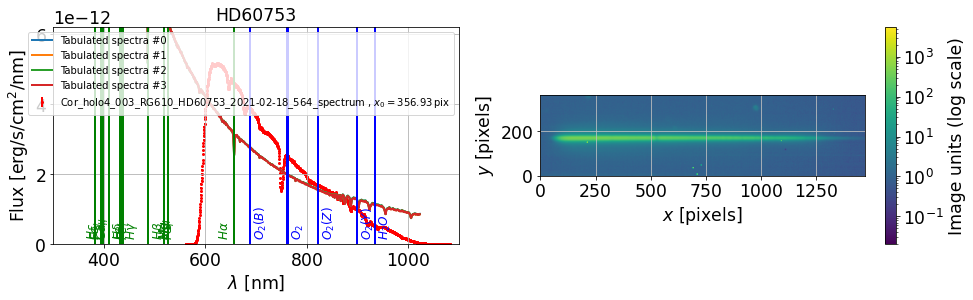

15 ) Cor_holo4_003_empty_HD60753_2021-02-18_566_spectrum.fits


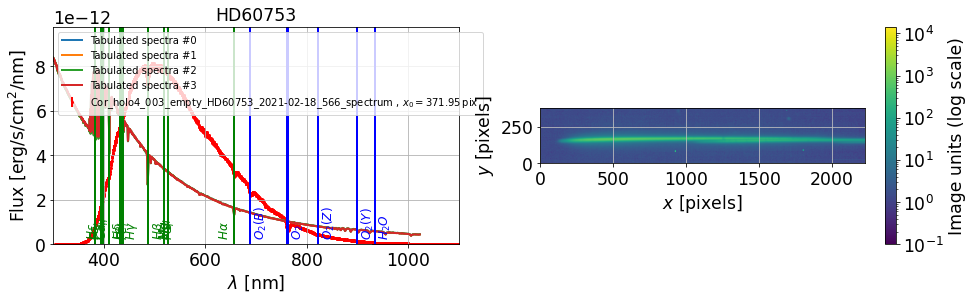

16 ) Cor_holo4_003_empty_HD60753_2021-02-18_568_spectrum.fits


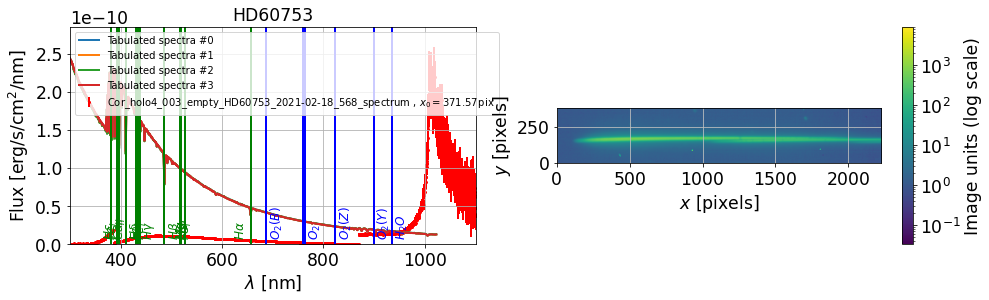

17 ) Cor_holo4_003_empty_HD60753_2021-02-18_569_spectrum.fits


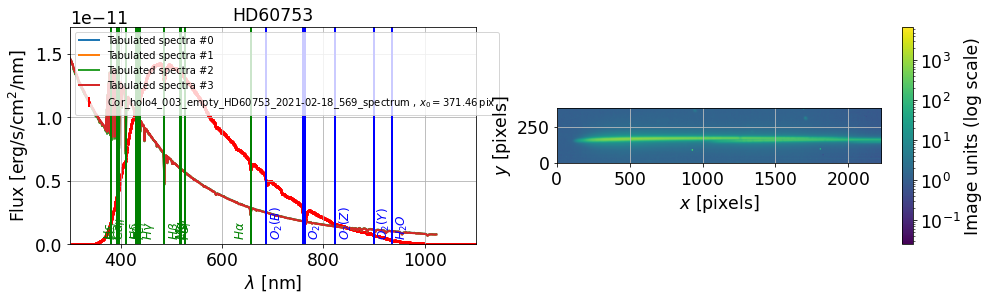

18 ) Cor_holo4_003_empty_HD60753_2021-02-18_570_spectrum.fits


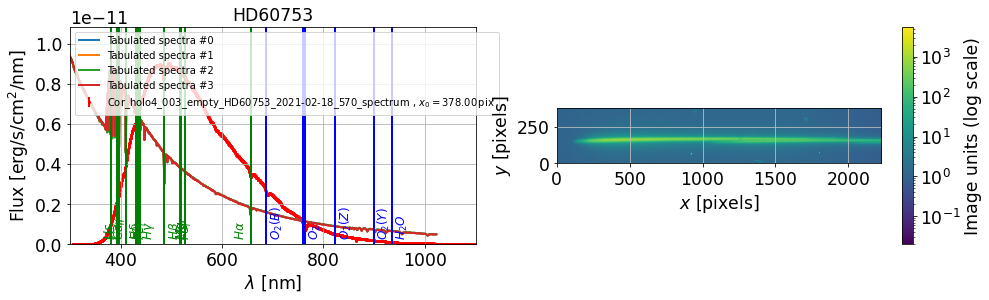

19 ) Cor_holo4_003_empty_HD60753_2021-02-18_572_spectrum.fits


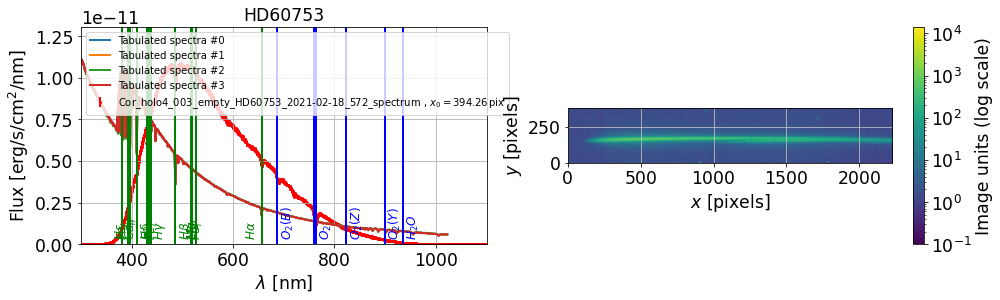

20 ) Cor_holo4_003_empty_HD60753_2021-02-18_573_spectrum.fits


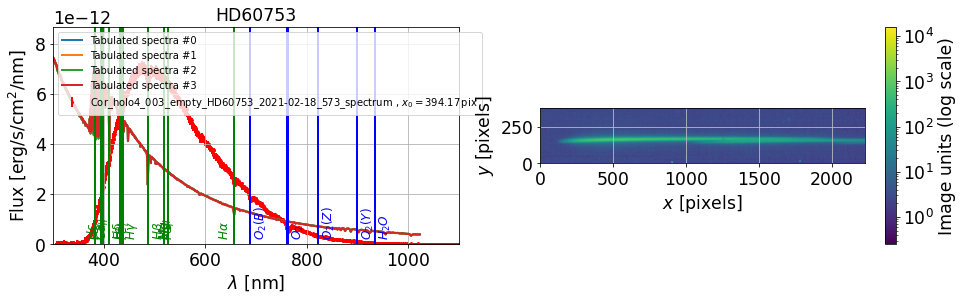

21 ) Cor_holo4_003_empty_HD60753_2021-02-18_574_spectrum.fits


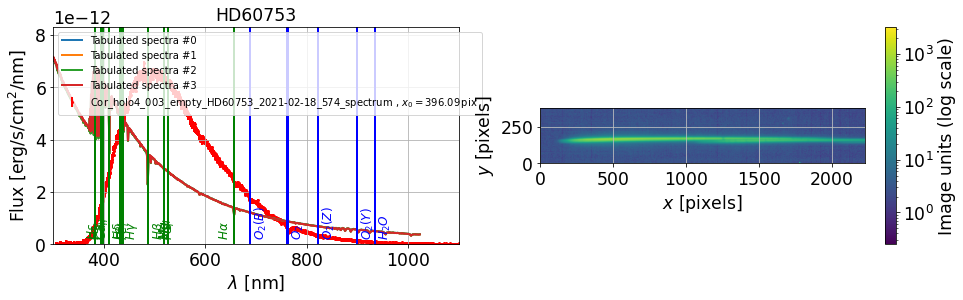

22 ) Cor_holo4_003_empty_HD60753_2021-02-18_575_spectrum.fits


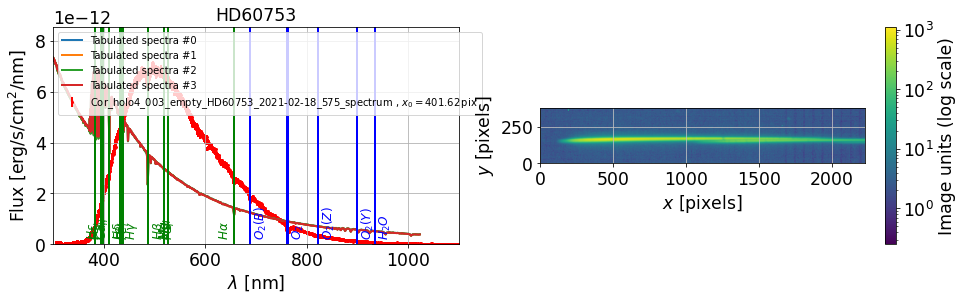

23 ) Cor_holo4_003_empty_HD60753_2021-02-18_576_spectrum.fits


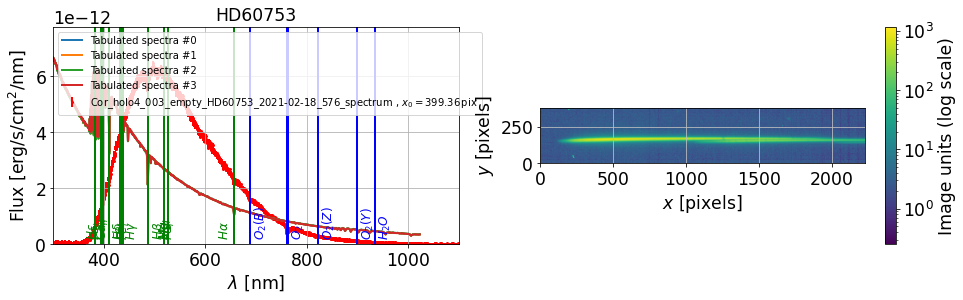

24 ) Cor_holo4_003_empty_HD60753_2021-02-18_577_spectrum.fits


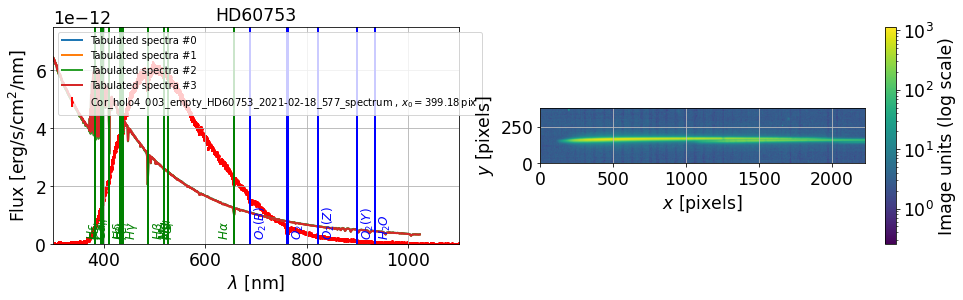

25 ) Cor_holo4_003_empty_HD60753_2021-02-18_578_spectrum.fits


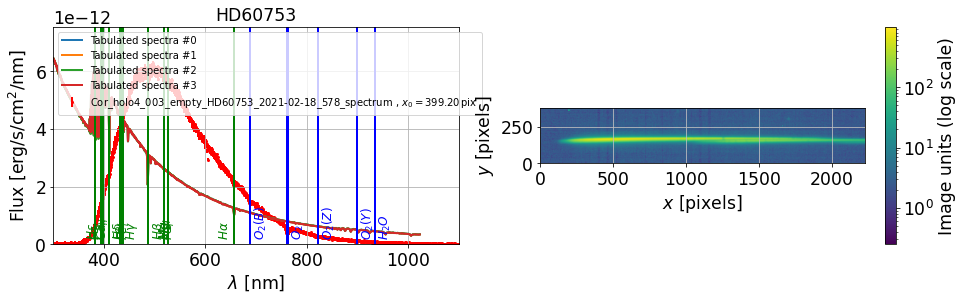

26 ) Cor_holo4_003_empty_HD60753_2021-02-18_579_spectrum.fits


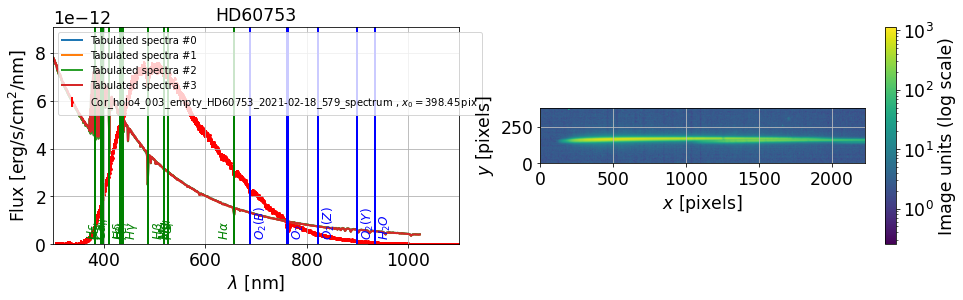

27 ) Cor_holo4_003_empty_HD60753_2021-02-18_580_spectrum.fits


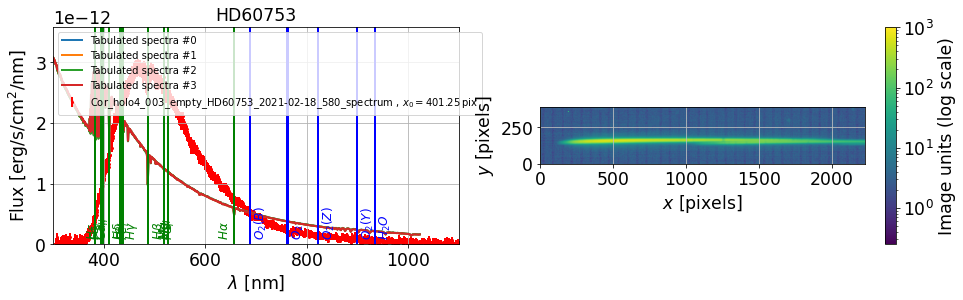

28 ) Cor_holo4_003_empty_HD60753_2021-02-18_581_spectrum.fits


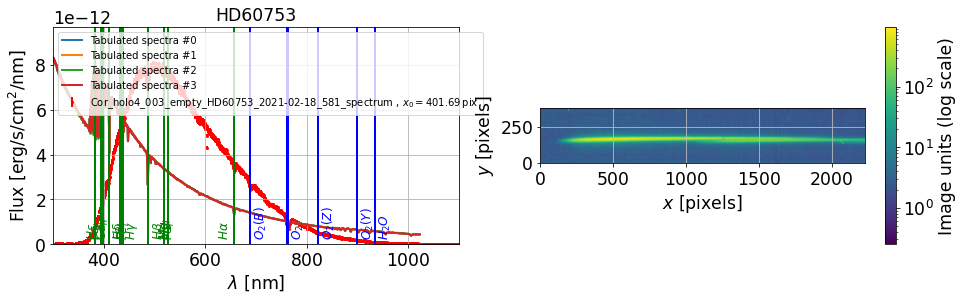

29 ) Cor_holo4_003_empty_HD60753_2021-02-18_582_spectrum.fits


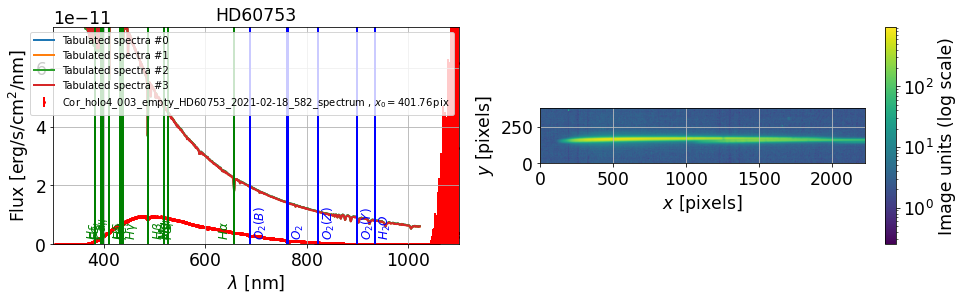

30 ) Cor_holo4_003_empty_HD60753_2021-02-18_583_spectrum.fits


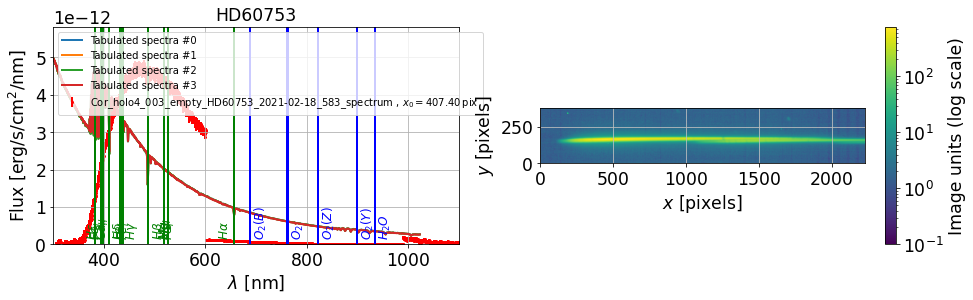

31 ) Cor_holo4_003_empty_HD60753_2021-02-18_584_spectrum.fits


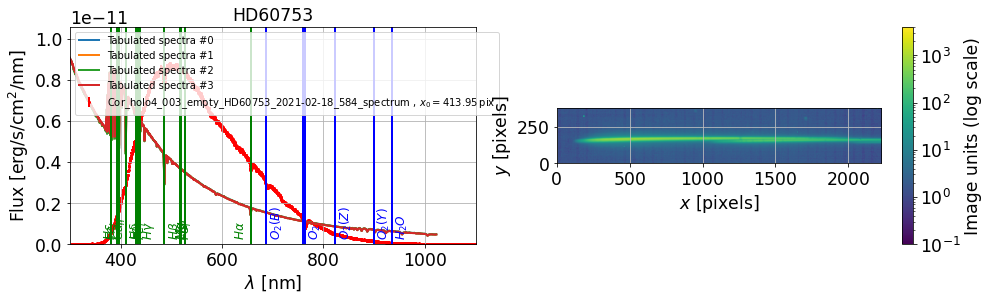

32 ) Cor_holo4_003_empty_HD60753_2021-02-18_585_spectrum.fits


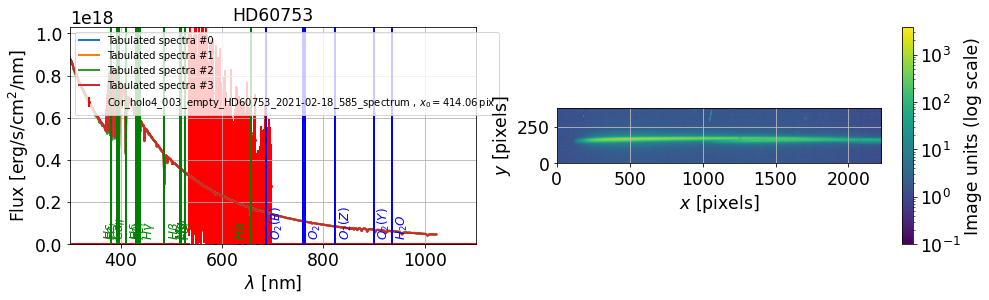

33 ) Cor_holo4_003_empty_HD60753_2021-02-18_586_spectrum.fits


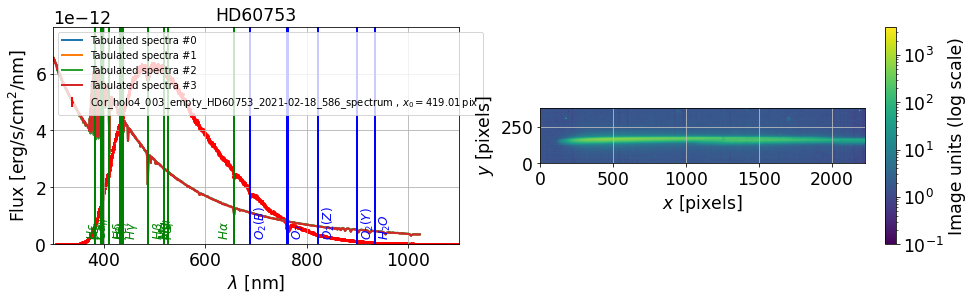

34 ) Cor_holo4_003_empty_HD60753_2021-02-18_587_spectrum.fits


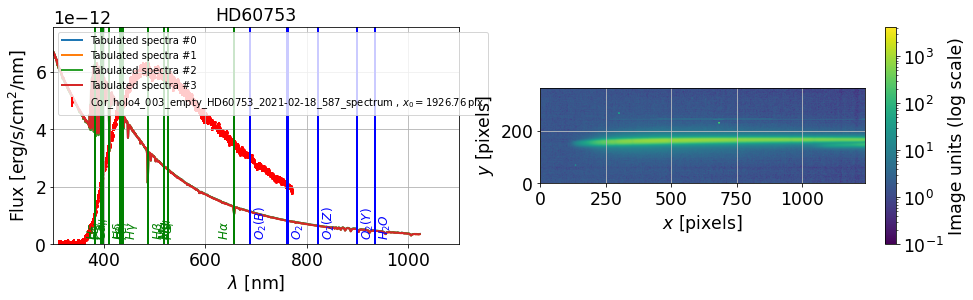

35 ) Cor_holo4_003_RG610_HD75519_2021-03-11_191_spectrum.fits


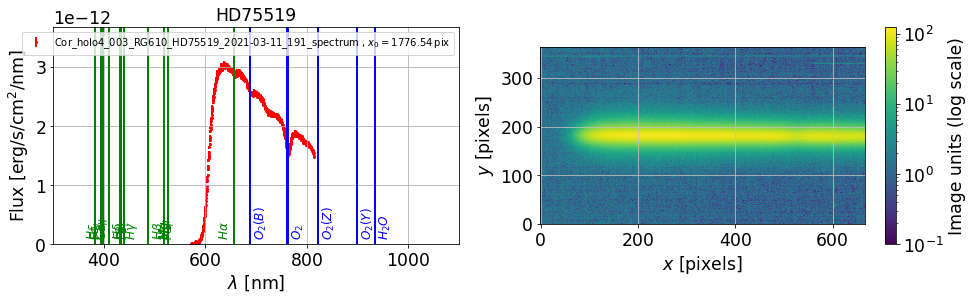

36 ) Cor_holo4_003_RG610_HD75519_2021-03-11_192_spectrum.fits


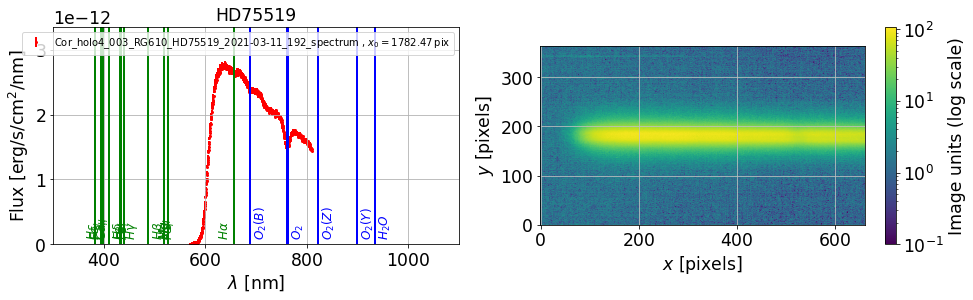

37 ) Cor_holo4_003_RG610_HD75519_2021-03-11_193_spectrum.fits


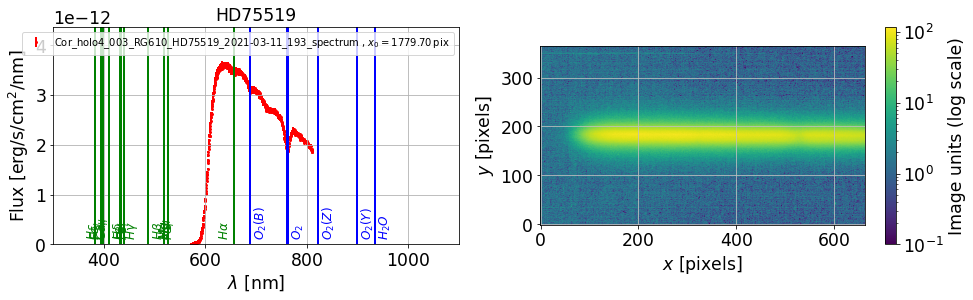

38 ) Cor_holo4_003_RG610_HD75519_2021-03-11_292_spectrum.fits


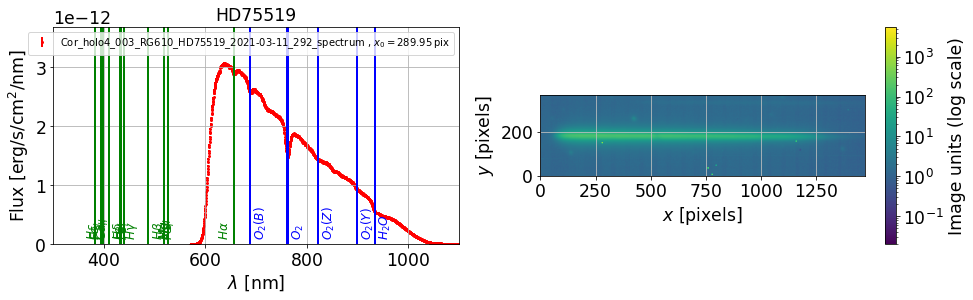

39 ) Cor_holo4_003_RG610_HD75519_2021-03-11_293_spectrum.fits


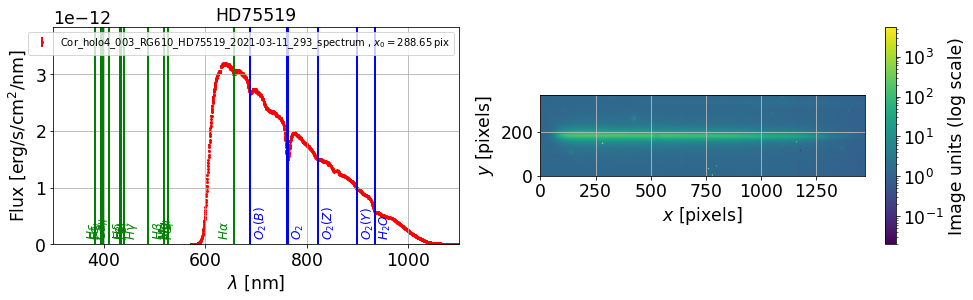

40 ) Cor_holo4_003_RG610_HD75519_2021-03-11_294_spectrum.fits


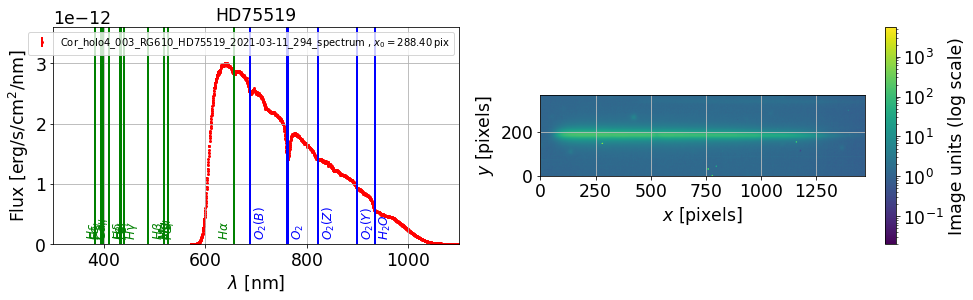

41 ) Cor_holo4_003_RG610_HD75519_2021-03-11_295_spectrum.fits


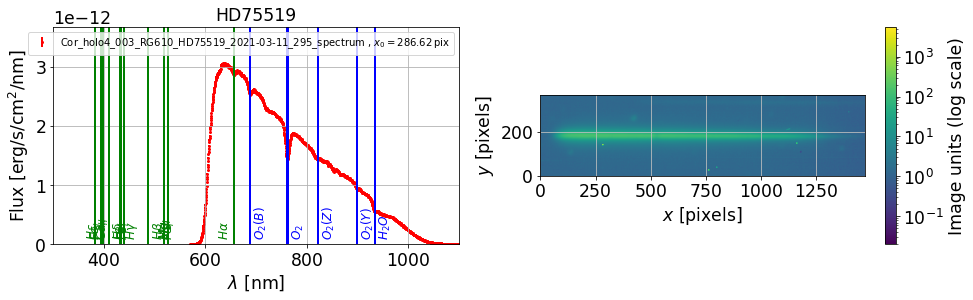

42 ) Cor_holo4_003_RG610_HD75519_2021-03-11_296_spectrum.fits


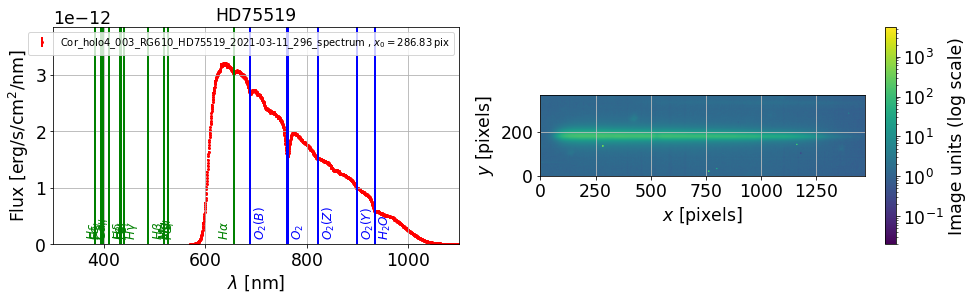

In [18]:
parameters.DISPLAY=False

idx=0
for filename in all_good_spectra_spectrum_files:
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    
    fullfilename = os.path.join(dir_spectra,filename)
    
    print(idx,")",filename)
    
    s=Spectrum(fullfilename, config="config/auxtel_quicklook.ini")
    label=filename.split('.')[0]+" "
    s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
    ax2 = fig.add_subplot(1, 2, 2)
    
    fullfilename2=fullfilename.replace("_spectrum","_spectrogram")
    
    s.load_spectrogram(fullfilename2)
    s.plot_spectrogram(ax=ax2,scale="log")
    
    plt.show()
    idx+=1
    

# Selection of spectra and equivalent width calculation

In [100]:
#IDXSEL=8
IDXSEL=9
filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")

## Load spectrum and Spectrogram

In [101]:
s=Spectrum(fullfilename, config="config/auxtel_quicklook.ini")
s.load_spectrogram(fullfilename_spectrogram_SEL) 

In [102]:
lines = Lines([O2_1,H2O_1],atmospheric_lines=True, redshift=0, emission_spectrum=True)

In [103]:
s.lines = lines

In [104]:
lambdas = np.arange(300,1000,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)

In [105]:
global_chisq = detect_lines(lines, s.lambdas, s.data, s.err, fwhm_func=fwhm_func)

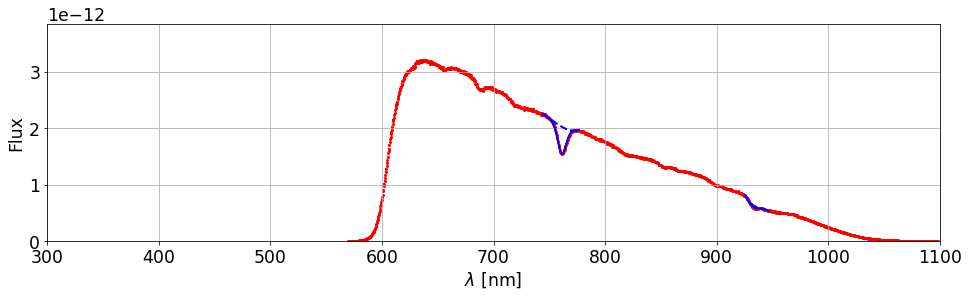

In [106]:
fig = plt.figure()
plot_spectrum_simple(plt.gca(), s.lambdas, s.data, s.err)
lines.plot_detected_lines(plt.gca())
plt.show()

In [107]:
lines.print_detected_lines()

<Table length=2>
  Line  Tabulated  Detected   Shift    ...  Chisq   Eqwidth_mod Eqwidth_data
            nm        nm        nm     ... reduced       nm          nm     
bytes12  float32   float32   float32   ... float32    float32     float32   
------- --------- --------- ---------- ... -------- ----------- ------------
            760.3 761.17535  0.8753237 ... 1.267925   2.1427703    2.1986985
$H_2 O$     935.0  933.1373 -1.8626823 ... 4.488628  0.50051296    -8.549142

8 )  Cor_holo4_003_RG610_HD60753_2021-02-18_556_spectrum.fits


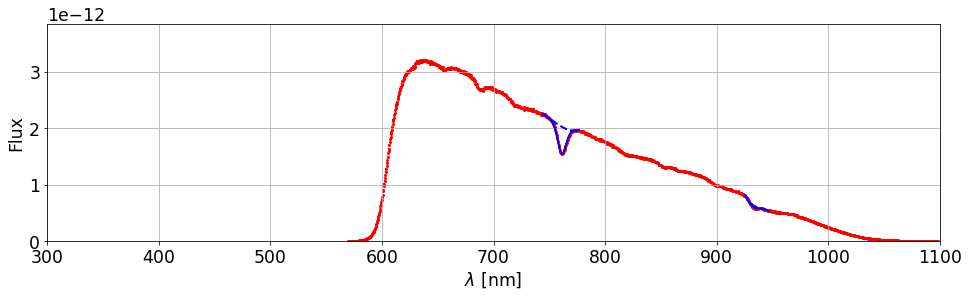

  Line  Tabulated  Detected   Shift    ...  Chisq   Eqwidth_mod Eqwidth_data
            nm        nm        nm     ... reduced       nm          nm     
------- --------- --------- ---------- ... -------- ----------- ------------
            760.3 761.17535  0.8753237 ... 1.267925   2.1427703    2.1986985
$H_2 O$     935.0  933.1373 -1.8626823 ... 4.488628  0.50051296    -8.549142
9 )  Cor_holo4_003_RG610_HD60753_2021-02-18_559_spectrum.fits


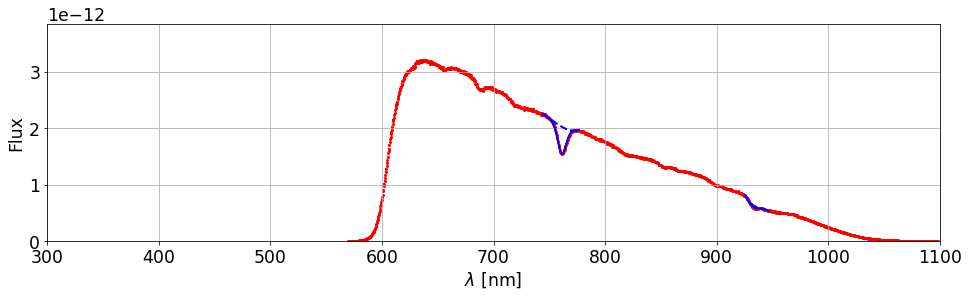

  Line  Tabulated  Detected   Shift    ...  Chisq   Eqwidth_mod Eqwidth_data
            nm        nm        nm     ... reduced       nm          nm     
------- --------- --------- ---------- ... -------- ----------- ------------
            760.3 761.17535  0.8753237 ... 1.267925   2.1427703    2.1986985
$H_2 O$     935.0  933.1373 -1.8626823 ... 4.488628  0.50051296    -8.549142
10 )  Cor_holo4_003_RG610_HD60753_2021-02-18_560_spectrum.fits


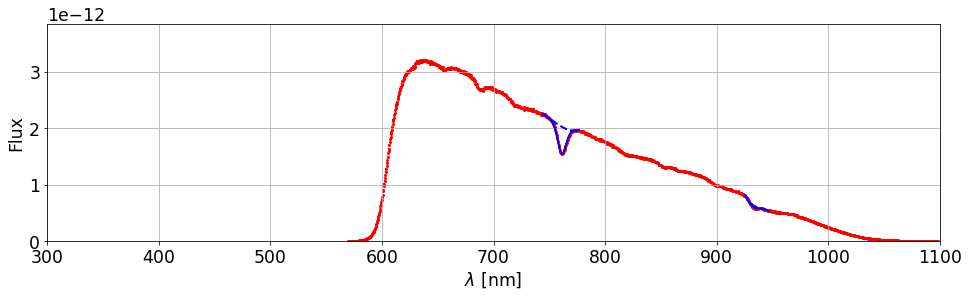

  Line  Tabulated  Detected   Shift    ...  Chisq   Eqwidth_mod Eqwidth_data
            nm        nm        nm     ... reduced       nm          nm     
------- --------- --------- ---------- ... -------- ----------- ------------
            760.3 761.17535  0.8753237 ... 1.267925   2.1427703    2.1986985
$H_2 O$     935.0  933.1373 -1.8626823 ... 4.488628  0.50051296    -8.549142
11 )  Cor_holo4_003_RG610_HD60753_2021-02-18_561_spectrum.fits


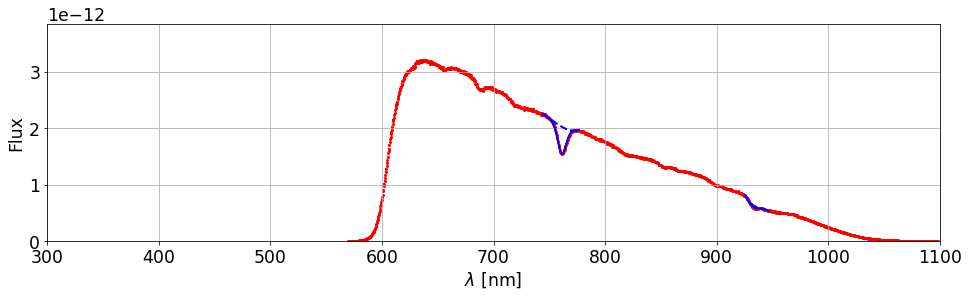

  Line  Tabulated  Detected   Shift    ...  Chisq   Eqwidth_mod Eqwidth_data
            nm        nm        nm     ... reduced       nm          nm     
------- --------- --------- ---------- ... -------- ----------- ------------
            760.3 761.17535  0.8753237 ... 1.267925   2.1427703    2.1986985
$H_2 O$     935.0  933.1373 -1.8626823 ... 4.488628  0.50051296    -8.549142
12 )  Cor_holo4_003_RG610_HD60753_2021-02-18_562_spectrum.fits


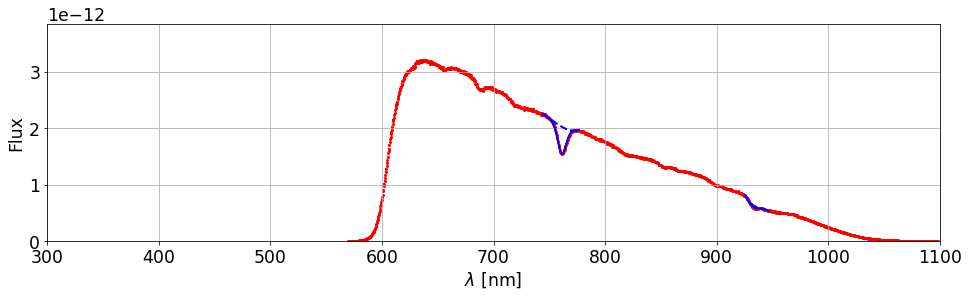

  Line  Tabulated  Detected   Shift    ...  Chisq   Eqwidth_mod Eqwidth_data
            nm        nm        nm     ... reduced       nm          nm     
------- --------- --------- ---------- ... -------- ----------- ------------
            760.3 761.17535  0.8753237 ... 1.267925   2.1427703    2.1986985
$H_2 O$     935.0  933.1373 -1.8626823 ... 4.488628  0.50051296    -8.549142
13 )  Cor_holo4_003_RG610_HD60753_2021-02-18_563_spectrum.fits


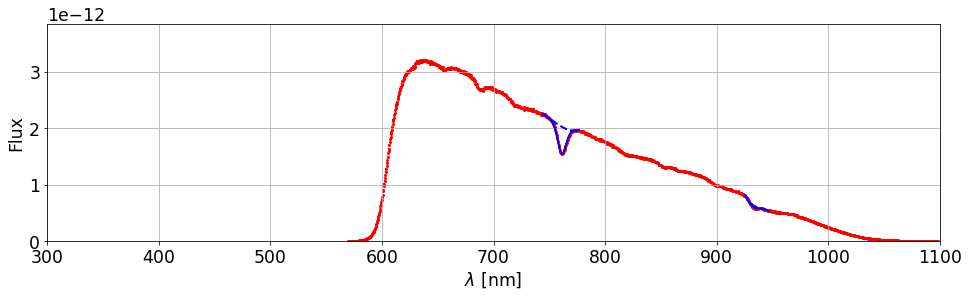

  Line  Tabulated  Detected   Shift    ...  Chisq   Eqwidth_mod Eqwidth_data
            nm        nm        nm     ... reduced       nm          nm     
------- --------- --------- ---------- ... -------- ----------- ------------
            760.3 761.17535  0.8753237 ... 1.267925   2.1427703    2.1986985
$H_2 O$     935.0  933.1373 -1.8626823 ... 4.488628  0.50051296    -8.549142
14 )  Cor_holo4_003_RG610_HD60753_2021-02-18_564_spectrum.fits


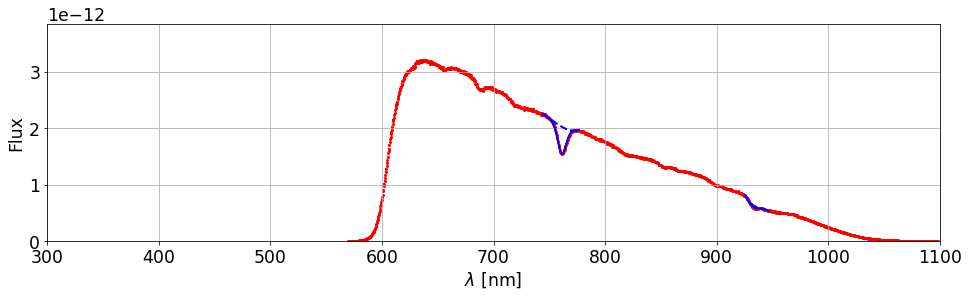

  Line  Tabulated  Detected   Shift    ...  Chisq   Eqwidth_mod Eqwidth_data
            nm        nm        nm     ... reduced       nm          nm     
------- --------- --------- ---------- ... -------- ----------- ------------
            760.3 761.17535  0.8753237 ... 1.267925   2.1427703    2.1986985
$H_2 O$     935.0  933.1373 -1.8626823 ... 4.488628  0.50051296    -8.549142


In [99]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(8,15):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename, config="config/auxtel_quicklook.ini")
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    #wlidx=np.where(np.logical_and( s.lambdas>=WLMIN, s.lambdas<=WLMAX))[0]
    #print(wlidx)
    #wl=s.lambdas[wlidx]
    
    #specify the lines  
    lines = Lines([O2_1,H2O_1],atmospheric_lines=True, redshift=0, emission_spectrum=True)
    s.lines = lines
    
    global_chisq = detect_lines(lines, s.lambdas, s.data, s.err, fwhm_func=fwhm_func)
    
    print(IDXSEL,") ",filename_SEL)
    fig = plt.figure()
    plot_spectrum_simple(plt.gca(), s.lambdas, s.data, s.err)
    lines.plot_detected_lines(plt.gca())
    plt.show()
    
    print(lines.print_detected_lines())
    
    
    
    
    